# Tutorial: Use on tensors

## 1. Check if the operator is differentiable 

In [1]:
import beacon_aug as BA
BA.properties.isOpDifferentiable(op=BA.RandomCrop(library="torch"))

********** torchvision : RandomCrop(size=(3, 3), padding=None)


True

## 2.  Use the transformation operator as a layer

Augmentation can also be used as network layer (e.g. [stylegan2-ada](https://github.com/NVlabs/stylegan2-ada-pytorch)) in limited data regimes

In [2]:
import torch
import beacon_aug as BA

size= (2, 3, 8, 8)  # rgb image (8x8) batch size 2,
x = torch.rand(size, requires_grad=True, device="cpu")
y = BA.RandomCrop(library="torch",height=4,width=4).apply(x, library="torch",as_layer=True)
print(x.shape, y.shape)


********** torchvision : RandomCrop(size=(4, 4), padding=None)
torch.Size([2, 3, 8, 8]) torch.Size([2, 3, 4, 4])


## 3. Pytorch Data Loader Example




In [3]:
from torchvision import transforms, datasets
import beacon_aug as BA


class TorchvisionAdapter:
    def __init__(self, transforms: BA.Compose):
        self.transforms = transforms

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))['image']


train_transform = TorchvisionAdapter(BA.Compose([
    BA.RandomResizedCrop(size=[224, 224], scale=(0.8, 1.2), library="torch"),
    BA.HorizontalFlip(library="torch"),
    BA.ColorJitter(p=0.8,library="torch"),
    BA.RandomGrayscale(p=0.2, library="torch"),
    BA.ToTensor(library="torch"),
]))

train_dataset = datasets.ImageFolder(root= "Your Data-Set-Folder",
                                     transform=train_transform)


********** torchvision : RandomResizedCrop(size=(224, 224), scale=(0.8, 1.2), ratio=(0.75, 1.3333), interpolation=bilinear)
********** torchvision : RandomHorizontalFlip(p=1)
********** torchvision : ColorJitter(brightness=[0.8, 1.2], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=[-0.2, 0.2])
********** torchvision : ToTensor()


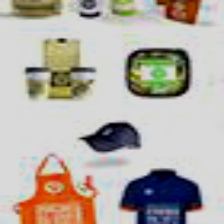

In [4]:
import numpy as np
from PIL import Image

Image.fromarray(np.uint8(train_dataset[0][0]*255))